# Replace colors for some figures

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [13]:
img_folder_in = "../../../x_output/ddn/color_change/input/"
img_folder_out = "../../../x_output/ddn/color_change/output/"


# Batch

In [31]:
import glob
img_files = glob.glob(img_folder_in+"*")

for f in img_files:
    img_in = plt.imread(f)
    f_name = f.split("\\")[-1]
    print(f_name)
    
    if np.max(img_in) > 1:
        img_in = img_in / 255.0  # for JPG

    nh, nw, _ = img_in.shape
    if img_in.shape[2] == 3:
        img = np.zeros((nh, nw, 4))
        img[:,:,:3] = img_in
        img[:,:,3] = 1.0
    else:
        img = np.copy(img_in)    
        img[:,:,3] = 1.0

    img1 = np.copy(img)
    for i in range(nh):
        for j in range(nw):
            x0 = img[i, j]
            if f_name == "1a.png":
                if x0[1] > x0[0]:
                    img1[i, j] = [x0[1],x0[0],x0[2],x0[3]]
            else:
                if x0[1] > x0[2]:  # more green than blue
                    img1[i, j] = [x0[0],x0[2],x0[1],x0[3]]
    
    plt.imsave(img_folder_out+f_name, img1)


1a.png
1b.jpg
1e.png
s3_bottom_right.png
s3_top.jpg
s5_cb_left.png
s5_cb_right.png
s5_pc_left.png
s5_pc_right.png


# Test an example

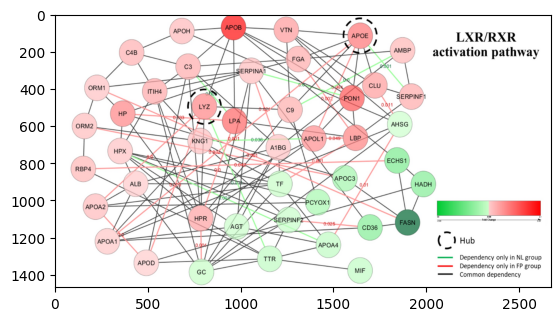

In [24]:
img = plt.imread(img_folder_in+"s3_top.jpg")
plt.imshow(img)

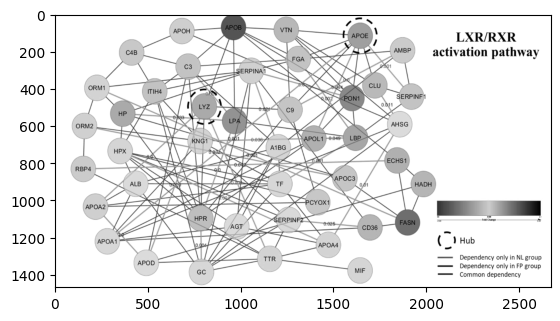

In [25]:
plt.imshow(img[:,:,2], cmap='gray')
# plt.clim(0, 1)

In [ ]:
# np.unravel_index(np.argmin(img[:,:,1]), img[:,:,1].shape)
# print(img[38, 436])

Color targets. Change green to blue.

In [ ]:
# col_markers = np.array([[192.0, 249, 202], [145, 255, 145], [75, 147, 111]])
# col_markers_scl = np.zeros_like(col_markers)
# for i, col in enumerate(col_markers):
#     col_markers_scl[i] = col/np.max(col)
# 
# nh, nw, _ = img.shape
# img1 = img.astype(float)
# dist = np.zeros((nh, nw))+3
# # msk = (np.max(img, axis=2)==0) + (np.min(img, axis=2)==1)

In [ ]:
# plt.imshow(msk)

In [ ]:
# for i in range(nh):
#     for j in range(nw):
#         # if msk[i, j]:
#         #     continue
#         x0 = img[i, j]
#         # if np.max(x) >0:
#         #     continue
#         # # if np.min(x) == 1:
#         # #     continue
#         # x0 = x/np.max(x)
#         d0 = np.zeros(len(col_markers_scl))
#         for k, col in enumerate(col_markers_scl):
#             d0[k] = np.sum((x0 - col)**2)
#         dist[i, j] = np.min(d0)


In [ ]:
# fig, ax = plt.subplots(figsize=(12,8))
# ax.imshow(dist)

In [ ]:
# fig, ax = plt.subplots(figsize=(12,8))
# ax.imshow(dist<0.031)

Swap green and blue values

In [68]:
nh, nw, _ = img.shape
img1 = np.copy(img)
for i in range(nh):
    for j in range(nw):
        x0 = img[i, j]
        if x0[1] > x0[2]:
            img1[i, j] = [x0[0],x0[2],x0[1],x0[3]]


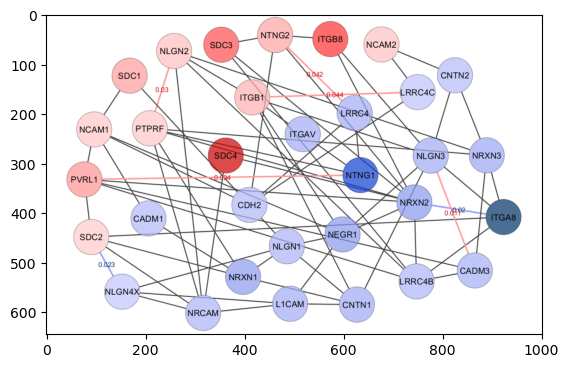

In [69]:
plt.imshow(img1)

In [71]:
plt.imsave("./temp/s5_cb_left_x.png", img1)